# Bayes' Theorem for Classification

We want classify an observation into one of $K$ classes. We define $\pi_k$ as the *prior* which is the probability that a random chosen observation comes from the *k*th class. We can also define the *density function* $f_k(x)≡ Pr(X=x|Y=k)$ which is large if there is a high probability of an instance belonging to a class k and small if the probability is small. Bayes theorem states:

$$Pr(Y=k|X=x)=\frac{\pi_k f_k(x)}{\sum_{l=1}^{K}\pi_l f_l(x)}$$

It is easy to compute the priors because they are simply the fraction of the *k*th class being in the training set. Computing $f_k(X)$ is more difficult since it requires a guess of the density of the data.

Usually the denominator in this expression can be disregarded as we only need to maximise the numerator.

## Single Dimensional Classification with predetermined Gaussian Distributions

We can assume $f_k(X)$ takes the form of a *Guassian Distribution*:

$$f(x) = \frac{1}{\sqrt{2\pi}\sigma_k}\exp \Bigg(-\frac{1}{2\sigma_k^2}(x-\mu_k)^2\Bigg)$$

We will make one more assumption which is that all the classes have the same variance so we replace $\sigma^2_k$ with $\sigma^2$. By inserting the distribution into Bayes theorem and taking the natural log of both sides to simplify we get:


$$\delta_k(x)=x\cdot \frac{\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+\ln (\pi_k)$$

Here we can see that the higher the value for delta, the higher the probability of an observation observation belonging to that class. We can apply this formula in a one dimensional example with K=2 where we know the values for the mean and variance. We know $\pi_1=\pi_2$ so solving for the x value where the $\delta_k(x)$ gives each class equal probability is:

$$x=\frac{\mu_1+\mu_2}{2}$$

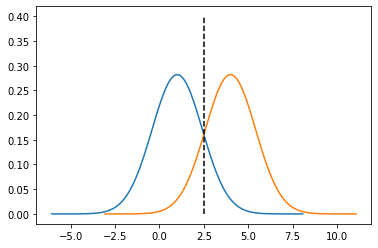

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu1 = 1
variance1 = 2
sigma1 = math.sqrt(variance1)

x1 = np.linspace(mu1 - 5*sigma1, mu1 + 5*sigma1, 100)
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma1))

mu2 = 4
variance2 = 2
sigma2 = math.sqrt(variance2)

x2 = np.linspace(mu2 - 5*sigma2, mu2 + 5*sigma2, 100)
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma2))

y = np.linspace(0, 0.4)
x = [(mu1+mu2)/2 for i in range(50)]

plt.plot(x,y,'--',color='black')

plt.show()

## Linear Discriminant Analysis

For multiple variables we can assume $f_k(X)$ takes the form of the *Multivariate Guassian Distribution*:

$$f(x) = \frac{1}{(2\pi)^{p/2}|\Sigma_k|^{1/2}}\exp \Bigg(-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)\Bigg)$$

$\Sigma_k$ is the covariance matrix of each class and and $\mu_k$ is the mean of each class. We will assume all classes have the same covariance matrix and rewrite the means using a mean vector. This gives us that $\Sigma=\text{Cov}(X)$ and $\mu=\begin{bmatrix}\mu_1, \mu_2...\mu_k\end{bmatrix}$. By inserting this distribution into Bayes theorem and taking the natural log of both sides to simplify we get:

$$\delta(X)=X^T \Sigma^{-1}\mu-\frac{1}{2}\mu^T \Sigma^{-1}\mu+\ln (\pi)$$

Let's apply this to the [LDA](https://github.com/AlbinFranzen/Machine-Learning-Portfolio/blob/master/ML%20algorithms%20from%20scratch/Unsupervised%20Learning/Dimensionality%20Reduction/Linear%20Discriminant%20Analysis.ipynb) data by first importing the iris dataset:

In [2]:
#stability
import numpy as np
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
f_0 = iris.data[:,2]  # we only take the first two features.
f_1 = iris.data[:,3]
X = np.vstack((f_0, f_1))

X = X.T
X = X[:100]
X1 = X[:50]
X2 = X[50:100]

X = X.T
y = iris.target

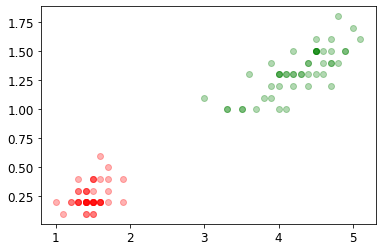

In [4]:
plt.scatter(X1[:,0],X1[:,1],color="r",alpha=0.3)
plt.scatter(X2[:,0],X2[:,1],color="g",alpha=0.3)
plt.show()

Great now let's apply the algorithm:

In [5]:
Sigma = np.cov(X)
Mu = np.vstack((X1.mean(0), X2.mean(0))).T
pi = np.hstack((len(X1)/len(X.T), len(X2)/len(X.T)))
#the formula
deltas = X.T.dot(np.linalg.inv(Sigma)).dot(Mu)-np.diag(0.5*Mu.T.dot(np.linalg.inv(Sigma)).dot(Mu))+pi
deltas.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Excellent! We our classifier successfully classified our training data (no surprise there really...). Now let's plot the decision boundary using the same values for $\mu$ and $\Sigma$:

In [6]:
#here we generate the data
x1_new = np.linspace(0,6,100) 
x2_new = np.linspace(0,2,100)

x1_new_mesh,x2_new_mesh = np.meshgrid(x1_new,x2_new)

x1_flat = x1_new_mesh.flatten()
x2_flat = x2_new_mesh.flatten()

X_new = np.vstack((x1_flat, x2_flat))

In [7]:
#calculate the argmax of the deltas
deltas_new = X_new.T.dot(np.linalg.inv(Sigma)).dot(Mu)-np.diag(0.5*Mu.T.dot(np.linalg.inv(Sigma)).dot(Mu))
output = deltas_new.argmax(axis=1)
colors = ['mistyrose' if x==0 else 'azure' for x in output]

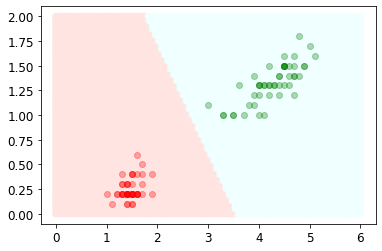

In [8]:
plt.scatter(x1_flat,x2_flat,c=colors)

plt.scatter(X1[:,0],X1[:,1],color="r",alpha=0.3)
plt.scatter(X2[:,0],X2[:,1],color="g",alpha=0.3)
plt.show()

## Quadratic Discriminant Analysis

The QDA is very similar to the LDA however the difference is instead of assuming all classes share a covariance matrix an individual covariance matrix is used for each class. It can be shown that the deltas then become:

$$\delta(X)=-\frac{1}{2}X^T \Sigma^{-1}X+X^T\Sigma^{-1}\mu -\frac{1}{2}\mu^T \Sigma^{-1}\mu -\frac{1}{2}\ln |\Sigma^{-1}|+\ln (\pi)$$

Now let's implement it:

In [15]:
Sigma1 = np.cov(X1.T)
Sigma2 = np.cov(X2.T)
Mu = np.vstack((X1.mean(0), X2.mean(0))).T
pi = np.hstack((len(X1)/len(X.T), len(X2)/len(X.T)))

term1 = -0.5*np.vstack((np.diag(X.T.dot(np.linalg.inv(Sigma1)).dot(X)),np.diag(X.T.dot(np.linalg.inv(Sigma2)).dot(X)))).T
term2 = np.vstack((X.T.dot(np.linalg.inv(Sigma1)).dot(X1.mean(0)),X.T.dot(np.linalg.inv(Sigma2)).dot(X2.mean(0)))).T
term3 = 0.5*np.array((Mu.T.dot(np.linalg.inv(Sigma1)).dot(Mu)[0][0],Mu.T.dot(np.linalg.inv(Sigma2)).dot(Mu)[1][1]))
term4 = -0.5*np.array([np.log(np.linalg.det(Sigma1)),np.log(np.linalg.det(Sigma2))])
term5 = np.hstack((len(X1)/len(X.T), len(X2)/len(X.T)))

deltas_qda = term1+term2+term3+term4+term5
output_qda = deltas_qda.argmax(axis=1)

Let's use the same means and covariances to predict new generated data:

In [13]:
#here we generate the data
x1_new = np.linspace(0,6,200) 
x2_new = np.linspace(0,2,200)

x1_new_mesh,x2_new_mesh = np.meshgrid(x1_new,x2_new)

x1_flat = x1_new_mesh.flatten()
x2_flat = x2_new_mesh.flatten()

X = np.vstack((x1_flat, x2_flat))

In [14]:
term1 = -0.5*np.vstack((np.diag(X.T.dot(np.linalg.inv(Sigma1)).dot(X)),np.diag(X.T.dot(np.linalg.inv(Sigma2)).dot(X)))).T
term2 = np.vstack((X.T.dot(np.linalg.inv(Sigma1)).dot(X1.mean(0)),X.T.dot(np.linalg.inv(Sigma2)).dot(X2.mean(0)))).T
term3 = 0.5*np.array((Mu.T.dot(np.linalg.inv(Sigma1)).dot(Mu)[0][0],Mu.T.dot(np.linalg.inv(Sigma2)).dot(Mu)[1][1]))
term4 = -0.5*np.array([np.log(np.linalg.det(Sigma1)),np.log(np.linalg.det(Sigma2))])
term5 = np.hstack((len(X1)/len(X.T), len(X2)/len(X.T)))

deltas_qda = term1+term2+term3+term4+term5
output_qda = deltas_qda.argmax(axis=1)

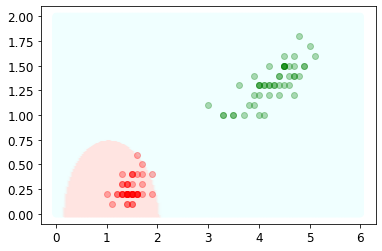

In [15]:
colors = ['mistyrose' if x==0 else 'azure' for x in output_qda]

plt.scatter(x1_flat,x2_flat,c=colors)

plt.scatter(X1[:,0],X1[:,1],color="r",alpha=0.3)
plt.scatter(X2[:,0],X2[:,1],color="g",alpha=0.3)
plt.show()

Looks good!